# Linear Regression

See basic example here:
> http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

and full documentation of the linear_model module here:
> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Setup

First, make sure you have installed all of the necessary Python libraries, following [the instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3).

Next, we want to make sure we can display our graphs in this notebook and import all of the libraries we'll need into the notebook.

In [1]:
# to display graphs in this notebook
%matplotlib inline

In [2]:
import numpy.random # for generating a noisy data set
from sklearn import linear_model # for model fitting/training
import matplotlib.pyplot # for plotting in general
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

## Data Generation

We're going to generate some fake data to test out our ideas about linear regression. These constant variables decide some of the characteristics of our data: the x range (which will also be used to set the size of the graph later) and how many inputs we should generate.

In [3]:
MIN_X = -10
MAX_X = 10
NUM_INPUTS = 50

### Dataset 1

Our first dataset has just one input feature. We are going to pick out 50 random real numbers between our min and max. Then, we will generate one output for each of these inputs following the function $y = 0.3x + 1$.

To make this look like real data, we will add a bit of of noise to it. We get the noise by picking numbers in a [normal distribution (also called bell curve)](http://www.statisticshowto.com/probability-and-statistics/normal-distributions/) around zero.

In [4]:
# generate some normally distributed noise
noise = numpy.random.normal(size=NUM_INPUTS)

# randomly pick numbers for x
x1 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

# x1 is an array of arrays, which we will need later for the model training function,
#   but sometimes we also need it as a simple 1D array, for graphing. It will also be
#   easier to generate our output data from 1D array.
# The [:,0] slicing pulls out the values into a one-dimensional list. The ':'
#   says to take everything from the first dimension, and the '0' says to only
#   take the first element from the second dimension. We go from something like
#   [[5.2], [3.1], [-2.6],...] to [5.2, 3.1, -2.6,...]
x1_1d = x1[:,0]

# y = 0.3x + 1
# Here is a really useful feature of numpy! If you multiply or add a single number and
#   a numpy array, it will multiply or add that number to every element in the array.
#   But if you add one array to another, it will add each corresponding element together.
#   For example, if x1_1d is [5.2, 3.1, -2.6] and noise is [-0.01, 0.01, 0.02] then we
#   get y1 = [2.55,1.94,0.24] (because, for instance, 0.3 * 3.1 + 1 + 0.01 = 1.94)
y1 = 0.3 * x1_1d + 1 + noise

# And here is a useful feature of Jupyter notebooks. If you put an expression in the last
# line of a cell, it will display the value of that expression
y1

array([-3.36149511, -0.68838168,  3.3169319 , -0.34819077,  0.81619809,
       -3.53341161, -3.75339713,  0.67388628, -1.41418316, -1.52356107,
        4.37770904,  3.05130317,  1.39593427,  1.60974805,  1.74374605,
        3.39893296,  2.43542032,  0.68043558,  4.80136211,  0.64231248,
        4.88372779,  2.00232851, -0.31589411,  3.39364366,  4.71516979,
       -3.89749614, -1.90497274,  1.18337388, -1.2852951 , -0.34727376,
        1.85299504,  2.92613279, -1.82470341,  1.12283517,  0.59433137,
       -0.9228223 ,  3.98571614,  0.93845865, -1.24401589,  3.50455895,
       -0.78377661, -0.17115999,  3.16749637,  1.05186902,  0.04946846,
        0.19398591,  0.50011288,  0.74961497, -1.81260046,  2.8105193 ])

## Training

Now that we have our data, we can train our model -- have it find the best fit to our data. We will use the linear model module from the scikit-learn library to do this.

Note: you may get a warning about LAPACK. According to [this discussion on the scikit-learn github page](https://github.com/scipy/scipy/issues/5998), this is safe to ignore.

In [6]:
model1 = linear_model.LinearRegression()
model1.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Results and Visualization

Now, let's see what our model learned. We can look at the results numerically:

In [7]:
def print_model_fit(model):
    # Print out the parameters for the best fit line
    print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

    # Print out the model's guesses for some values of x
    datapoints = [[-1],[0],[1]]
    predictions = model.predict(datapoints)
    for datapoint, prediction in zip(datapoints, predictions):
        print('Model prediction for {}: {}'.format(datapoint[0], prediction))

In [8]:
print_model_fit(model1)

Intercept: 0.776748425067266  Coefficients: [0.30410535]
Model prediction for -1: 0.4726430769479441
Model prediction for 0: 0.776748425067266
Model prediction for 1: 1.080853773186588


We can also look at them graphically.

In [9]:
def graph_one_input_model(model, x_1d, y):
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data and Best-Fit Line')
    matplotlib.pyplot.xlabel('x')
    matplotlib.pyplot.ylabel('y')

    # put the generated dataset points on the graph
    matplotlib.pyplot.scatter(x_1d, y)

    # predict for inputs along the graph to find the best-fit line
    X = numpy.linspace(MIN_X, MAX_X)
    Y = model.predict(list(zip(X)))
    matplotlib.pyplot.plot(X, Y)

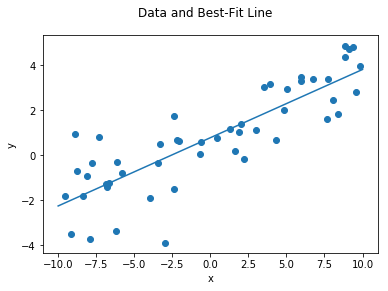

In [10]:
graph_one_input_model(model1, x1_1d, y1)

# Exercise Option (Standard Difficulty)

Answer the following questions about dataset 1:
1. What output did you expect to see printed if the linear regression code was working, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?

### Dataset 2

This dataset still just has one input, so the code is very similar to our first one. However, now the generating function is quadratic, so this one will be trickier to deal with.

Again, we'll go through dataset generation, training, and visualization.

Intercept: 24.798173639754705  Coefficients: [-0.48041435]
Model prediction for -1: 25.27858798983017
Model prediction for 0: 24.798173639754705
Model prediction for 1: 24.317759289679238


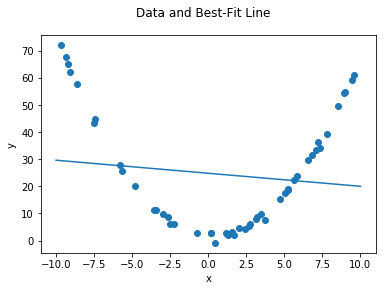

In [11]:
# Generate some normally distributed noise
noise = numpy.random.normal(size=NUM_INPUTS)

# randomly pick numbers for x
x2 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

# get a 1D array of the input data
x2_1d = x2[:,0]

# y = 0.7x^2 - 0.4x + 1.5
y2 = 0.7 * x2_1d * x2_1d - 0.4 * x2_1d + 1.5 + noise

# use scikit-learn's linear regression model and fit to our data
model2 = linear_model.LinearRegression()
model2.fit(x2, y2)

# show results
print_model_fit(model2)
graph_one_input_model(model2, x2_1d, y2)

# Exercise Option (Advanced)

Get the linear regression to work better for dataset 2. There are a couple different ways to do this, but all of them will involve some new code. If you have ideas but just aren't sure how to translate them into code, please ask for help!

### Dataset 3

Finally, let's look at a dataset has two inputs, like [the tree example in our notes](https://jennselby.github.io/MachineLearningCourseNotes/#linear-regression).

This will make it a littler harder to visualize, particularly because you cannot rotate the graph interactively in the Jupyter notebook. If you are interested in looking more closely at this graph, you can copy the code below (plus the code in the second and third code cells) into a file and run it through Python normally. This will open a graph window that will allow you to drag to rotate the graph.

Intercept: -1.8141201022609101  Coefficients: [ 0.49878577 -0.20179188]


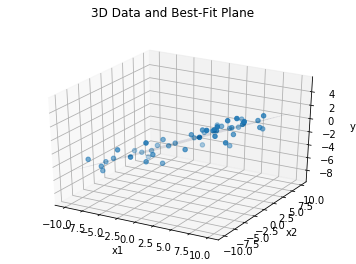

In [12]:
# randomly pick pairs of numbers for x
# the 2 in the size is how we get pairs instead of single numbers
x3 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 2))

# Get a 1D array of each input
x3_1_1d = x3[:,0]
x3_2_1d = x3[:,1]

# y = 0.5x_1 - 0.2x_2 - 2
y3 = 0.5 * x3_1_1d - 0.2 * x3_2_1d - 2 + noise

# use scikit-learn's linear regression model and fit to our data
model3 = linear_model.LinearRegression()
model3.fit(x3, y3)

# Print out the parameters for the best fit plane
print('Intercept: {0}  Coefficients: {1}'.format(model3.intercept_, model3.coef_))

# 3D Plot
# create the figure
fig = matplotlib.pyplot.figure(1)
fig.suptitle('3D Data and Best-Fit Plane')

# get the current axes, and tell them to do a 3D projection
axes = fig.gca(projection='3d')
axes.set_xlabel('x1')
axes.set_ylabel('x2')
axes.set_zlabel('y')

# put the generated points on the graph
axes.scatter(x3_1_1d, x3_2_1d, y3)

# predict for input points across the graph to find the best-fit plane
# and arrange them into a grid for matplotlib
X1 = X2 = numpy.arange(MIN_X, MAX_X, 0.05)
X1, X2 = numpy.meshgrid(X1, X2)
Y = numpy.array(model3.predict(list(zip(X1.flatten(), X2.flatten())))).reshape(X1.shape)

# put the predicted plane on the graph
axes.plot_surface(X1, X2, Y, alpha=0.1)
   
# show the plots
matplotlib.pyplot.show()


# Exercise Option (Standard Difficulty)

Answer the following questions about dataset 3:
1. What output did you expect to see printed if the linear regression code was working, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?
1. Explain any differences you noticed between working with dataset 1 and dataset 3.